# Machine Learning Engineer Nanodegree
## Using Supervised Classification Algorithms to Predict Bank Term Deposit Subscription
Fabiano Shoji Yoschitaki  
July 8th, 2018

## Project Design

As it is described the capstone proposal document, the project is composed of the following activites:

- **Data and Library Loading: ** the first step is to load the Bank Marketing data set in the CSV format from the UCI's Machine Learning Repository and all the libraries needed for the project.

- **Data Exploration: ** in this step, we'll do some tasks like: visualize the data, print some samples, check its dimensions, check the most relevant features, show its statistical summary.  

- **Data Preparation: ** after exploring the data, pre-processing tasks will be done: data cleaning, remove null values, convert categorical features into dummy/indicator variables and split the data into training and testing datasets. 

- **Model Selection: ** with the prepared data, various supervised classification algorithms will be experimented in order to find compare their results and choose the best one (taking into account the accuracy score) for model tuning.  

- **Model Tuning: ** after we choose the best model, grid search cross validation will be applied with the objective to tune the hyper-parameters of the model.

- **Final Evaluation: ** in this step, the accuracy score of the tuned model will be evaluated by applying it to the testing dataset. 

-----------
### 1. Data and Library Loading
In this section, we will load the dataset and the libraries used in the project.  

#### 1.1. Library Loading
Loading all libraries needed for the project.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from time import time
from pandas.tools.plotting import scatter_matrix
from IPython.display import display

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
%matplotlib inline

#### 1.2. Data Loading
Loading the dataset from the CSV file.

In [2]:
bank_full_data = pd.read_csv('bank-full.csv', delimiter=';')
print("Bank dataset was loaded successfully!")

Bank dataset was loaded successfully!


-----------
### 2. Data Exploration
Here we will apply some methods/techniques for Exploratory Data Analysis to better understand the data.

#### 2.1. Data Dimensions
Printing the first 10 rows from the data.

In [3]:
print("The dataset has {} rows and {} columns".format(bank_full_data.shape[0], bank_full_data.shape[1]))

The dataset has 45211 rows and 17 columns


#### 2.2. Data Information
Printing information about column dtypes, non null values and memory usage.

In [4]:
bank_full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### 2.3. Data Samples
Printing the first 10 rows of the data.

In [5]:
bank_full_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


#### 2.4. Data Descriptive Statistics
Visualizing statistical summary of the data.

In [6]:
bank_full_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### 2.5 Data General Information
Exploring features information.

In [7]:
# Calculate number of clients
n_clients = len(bank_full_data)

# Calculate clients who have subscribed
n_clients_subscribed = len(bank_full_data[bank_full_data['y'] == 'yes'])

# Calculate clients who haven't subscribed
n_clients_not_subscribed = len(bank_full_data[bank_full_data['y'] == 'no'])

# Calculate graduation rate
subscription_rate = float(n_clients_subscribed)/float(n_clients) * 100

# Print the results
print("Total number of clients: {}".format(n_clients))
print("Number of clients who have subscribed: {}".format(n_clients_subscribed))
print("Number of clients who haven't subscribed: {}".format(n_clients_not_subscribed))
print("Subscription rate of the dataset: {:.2f}%".format(subscription_rate))
print("No-Subscription rate of the dataset: {:.2f}%".format(100-subscription_rate))

Total number of clients: 45211
Number of clients who have subscribed: 5289
Number of clients who haven't subscribed: 39922
Subscription rate of the dataset: 11.70%
No-Subscription rate of the dataset: 88.30%


#### 2.6. Visualization
Generating some graphs for visualization.

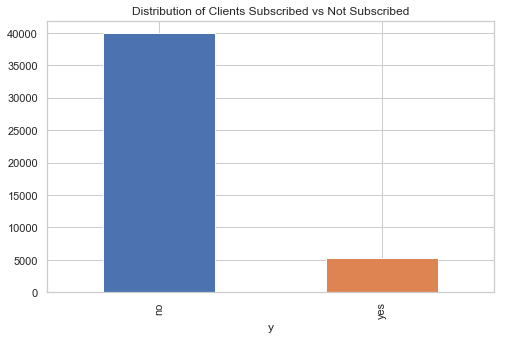

In [8]:
plt.figure(figsize=(8, 5))
plt.title("Distribution of Clients Subscribed vs Not Subscribed")
bank_full_data.groupby("y")['y'].count().plot.bar()

In [ ]:
age_histogram = sns.distplot(bank_full_data['age'], bins=10)
plt.title('Distribution by Age')
age_histogram.figure.set_size_inches(12, 6)
plt.show()

In [ ]:
figure = plt.figure(figsize=(12, 6))
mask = np.zeros_like(bank_full_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(bank_full_data.corr(), mask=mask, annot=True, cmap="Blues")
figure.suptitle('Correlation Matrix', fontsize=15)

-----------
### 3. Data Preparation
In this section we will apply some methods/techniques for Data Preprocessing.

#### 3.1. Checking for null values
If the dataset has null values, we must 

In [ ]:
bank_full_data.isnull().sum()

#### 3.1. Preprocessing Features
Applying pandas_get_dummies to convert categorical features into binary variables. Also, we'll replace 'yes' -> 1, 'no' -> 0.

In [9]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index=X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix=col)  
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

In [10]:
bank_full_data = preprocess_features(bank_full_data)
print("Processed feature columns ({} total features): \n{}".format(len(bank_full_data.columns), list(bank_full_data.columns)))

Processed feature columns (49 total features): 
['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default', 'balance', 'housing', 'loan', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'day', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'duration', 'campaign', 'pdays', 'previous', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y']


#### 3.2. Identifying Feature and Target Columns
Separating the feature columns from the target column.

In [11]:
# Extract feature columns
feature_cols = list(bank_full_data.columns[:-1])

# Extract target column 'y' (subscribed/not subscribed)
target_col = bank_full_data.columns[-1] 

# Show the list of columns
print("Feature columns:\n{}".format(feature_cols))
print("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = bank_full_data[feature_cols]
y_all = bank_full_data[target_col]

# Show the feature information by printing the first five rows
print("\nFeature values:")
print(X_all.head())

Feature columns:
['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default', 'balance', 'housing', 'loan', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'day', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'duration', 'campaign', 'pdays', 'previous', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']

Target column: y

Feature values:
   age  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0   58           0                0                 0              0   
1   44           0                0                 0      

In [12]:
X_all.head(10)

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month_oct,month_sep,duration,campaign,pdays,previous,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,0,0,0,1,0,0,0,0,...,0,0,261,1,-1,0,0,0,0,1
1,44,0,0,0,0,0,0,0,0,0,...,0,0,151,1,-1,0,0,0,0,1
2,33,0,0,1,0,0,0,0,0,0,...,0,0,76,1,-1,0,0,0,0,1
3,47,0,1,0,0,0,0,0,0,0,...,0,0,92,1,-1,0,0,0,0,1
4,33,0,0,0,0,0,0,0,0,0,...,0,0,198,1,-1,0,0,0,0,1
5,35,0,0,0,0,1,0,0,0,0,...,0,0,139,1,-1,0,0,0,0,1
6,28,0,0,0,0,1,0,0,0,0,...,0,0,217,1,-1,0,0,0,0,1
7,42,0,0,1,0,0,0,0,0,0,...,0,0,380,1,-1,0,0,0,0,1
8,58,0,0,0,0,0,1,0,0,0,...,0,0,50,1,-1,0,0,0,0,1
9,43,0,0,0,0,0,0,0,0,0,...,0,0,55,1,-1,0,0,0,0,1


#### 3.3. Training and Testing Datasets
Splitting data into training and testing datasets.

In [13]:
# Shuffle and split the dataset into the number of training and testing points above.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3, random_state=10)

print("Training set has {} samples with {:.2f}% of 'yes' (subscribed) and {:.2f}% of 'no' (not subscribed)."
      .format(X_train.shape[0], 
        100 * len(y_train[y_train == 1])/len(y_train), 
        100 * len(y_train[y_train == 0])/len(y_train)))

print("Testing set has {} samples with {:.2f}% of 'yes' (subscribed) and {:.2f}% of 'no' (not subscribed)."
      .format(X_test.shape[0], 
        100 * len(y_test[y_test == 1])/len(y_test), 
        100 * len(y_test[y_test == 0])/len(y_test)))

Training set has 31647 samples with 11.79% of 'yes' (subscribed) and 88.21% of 'no' (not subscribed).
Testing set has 13564 samples with 11.49% of 'yes' (subscribed) and 88.51% of 'no' (not subscribed).


#### 3.4. Feature Scaling
Rescaling the features for them to have standard normal distribution with mean 0 and a standard deviation 1.

In [14]:
sc = StandardScaler()
# Keep column header names for final importance plot.
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_all.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns=X_all.columns)

-----------
### 4. Model Selection
In this section we will select some supervised classification algorithms in order to choose the best one to tune in the last section.

#### 4.1. Selected Supervised Classification Algorithms
List of chosen algorithms:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Bagging (Ensemble Methods) 
- AdaBoost (Ensemble Methods) 
- Random Forest (Ensemble Methods)
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression (LR)
- eXtreme Gradient Boosting (XGBoost)

In [ ]:
classifiers = []
classifiers.append(GaussianNB())
classifiers.append(DecisionTreeClassifier(random_state=1))
classifiers.append(BaggingClassifier(random_state=1))
classifiers.append(AdaBoostClassifier(random_state=1))
classifiers.append(RandomForestClassifier(random_state=1))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(KNeighborsClassifier())
classifiers.append(SGDClassifier())
classifiers.append(SVC(random_state=1))
classifiers.append(LogisticRegression(random_state=1))
classifiers.append(XGBClassifier(random_state=1))

#### 4.2. Training, Predicting and Scoring Functions
Defining functions to train models, predict labels and show metric results: accuracy and f1-score.

In [15]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end-start))
    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on accuracy score. '''    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()    
    return y_pred

def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifier based on accuracy and F1-score. '''
    print("\nTraining classifier {} using a training set size of {}".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Predict labels for training and testing sets
    y_pred_train = predict_labels(clf, X_train, y_train)
    y_pred_test = predict_labels(clf, X_test, y_test)
    
    # Print the results of prediction for both training and testing
    print("Accuracy score for training set: {:.4f}.".format(accuracy_score(y_train, y_pred_train)))
    print("F1 score for training set: {:.4f}.".format(f1_score(y_train, y_pred_train)))
    print("Accuracy score for test set: {:.4f}.".format(accuracy_score(y_test, y_pred_test)))
    print("F1 score for test set: {:.4f}.".format(f1_score(y_test, y_pred_test)))    

#### 4.3. Evaluation
Evaluating all classifiers.

In [ ]:
for clf in classifiers:    
    train_predict(clf, X_train, y_train, X_test, y_test)

-----------
### 5. Model Tuning

#### 5.1. Cross Validation
Creating random data splits for training and testing sets.

In [ ]:
cv_sets = ShuffleSplit(test_size=0.20, random_state=1)
cv_sets.get_n_splits(X_train)
print(cv_sets)

In [16]:
tuned_params = {}

#### 5.2. Scoring for Grid Search Cross Validation
Creating multiple metric evaluation: Accuracy and F1-Score.

In [17]:
scoring = {
    'Accuracy': 'accuracy', 
    'F1-Score': 'f1'
}

#### 5.3. Default XGBoost
Creating XGBoost instance for tuning.

In [18]:
model_v0 = XGBClassifier(
    random_state=1)
train_predict(model_v0, X_train, y_train, X_test, y_test)


Training classifier XGBClassifier using a training set size of 31647
Trained model in 4.9085 seconds
Accuracy score for training set: 0.9085.
F1 score for training set: 0.5046.
Accuracy score for test set: 0.9082.
F1 score for test set: 0.4916.


#### 5.4. First tune: scale_post_weight
Tuning scale_pos_weight parameter.

In [19]:
params_0 = {
    'scale_pos_weight': [x for x in range(1,11)]
}
gs_0 = GridSearchCV(
    estimator=model_v0, 
    param_grid=params_0,
    scoring=scoring, 
    cv=10, 
    refit='Accuracy')
gs_0.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'scale_pos_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit='Accuracy',
       return_train_score='warn',
       scoring={'Accuracy': 'accuracy', 'F1-Score': 'f1'}, verbose=0)

In [20]:
tuned_params['scale_pos_weight'] = gs_0.best_params_['scale_pos_weight']
print("The best parameters and values found were: {}, best score: {}".format(tuned_params, gs_0.best_score_))

The best parameters and values found were: {'scale_pos_weight': 1}, best score: 0.904098334755269


In [21]:
model_v1 = XGBClassifier(
    random_state=1,
    scale_pos_weight=tuned_params['scale_pos_weight'])
train_predict(model_v1, X_train, y_train, X_test, y_test)


Training classifier XGBClassifier using a training set size of 31647
Trained model in 4.8145 seconds
Accuracy score for training set: 0.9085.
F1 score for training set: 0.5046.
Accuracy score for test set: 0.9082.
F1 score for test set: 0.4916.


#### 5.5. Second tune: objective
Tuning objective parameter.

In [22]:
params_1 = {
    'objective': [
        'reg:linear', 
        'reg:logistic',
        'binary:logistic',
        'binary:logitraw',
        'binary:hinge',
        'count:poisson',]
}
 
gs_1 = GridSearchCV(
    estimator=model_v1, 
    param_grid=params_1, 
    scoring=scoring, 
    cv=10, 
    refit='Accuracy')
gs_1.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'objective': ['reg:linear', 'reg:logistic', 'binary:logistic', 'binary:logitraw', 'binary:hinge', 'count:poisson']},
       pre_dispatch='2*n_jobs', refit='Accuracy',
       return_train_score='warn',
       scoring={'Accuracy': 'accuracy', 'F1-Score': 'f1'}, verbose=0)

In [23]:
tuned_params['objective'] = gs_1.best_params_['objective']
print("The best parameters and values found were: {}, best score: {}".format(gs_1.best_params_, gs_1.best_score_))

The best parameters and values found were: {'objective': 'reg:logistic'}, best score: 0.904098334755269


In [24]:
model_v2 = XGBClassifier(
    random_state=1,
    scale_pos_weight=tuned_params['scale_pos_weight'],
    objective=tuned_params['objective'])
train_predict(model_v2, X_train, y_train, X_test, y_test)


Training classifier XGBClassifier using a training set size of 31647
Trained model in 4.7975 seconds
Accuracy score for training set: 0.9085.
F1 score for training set: 0.5046.
Accuracy score for test set: 0.9082.
F1 score for test set: 0.4916.


#### 5.6. Third tune: max_depth and min_child_weight
Tuning max_depth and min_child_weight parameters.

In [25]:
params_2 = {
    'max_depth': [x for x in range(3, 9)],
    'min_child_weight': [x for x in range(1, 7)]
}
gs_2 = GridSearchCV(
    estimator=model_v2, 
    param_grid=params_2,
    scoring=scoring, 
    cv=10, 
    refit='Accuracy')
gs_2.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8], 'min_child_weight': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit='Accuracy',
       return_train_score='warn',
       scoring={'Accuracy': 'accuracy', 'F1-Score': 'f1'}, verbose=0)

In [26]:
tuned_params['max_depth'] = gs_2.best_params_['max_depth']
tuned_params['min_child_weight'] = gs_2.best_params_['min_child_weight']
print("The best parameters and values found were: {}, best score: {}".format(gs_2.best_params_, gs_2.best_score_))

The best parameters and values found were: {'max_depth': 6, 'min_child_weight': 1}, best score: 0.9064682276361109


In [27]:
model_v3 = XGBClassifier(
    random_state=1,
    scale_pos_weight=tuned_params['scale_pos_weight'],
    objective=tuned_params['objective'], 
    max_depth=tuned_params['max_depth'],
    min_child_weight=tuned_params['min_child_weight'])
train_predict(model_v3, X_train, y_train, X_test, y_test)


Training classifier XGBClassifier using a training set size of 31647
Trained model in 15.3295 seconds
Accuracy score for training set: 0.9321.
F1 score for training set: 0.6650.
Accuracy score for test set: 0.9109.
F1 score for test set: 0.5476.


#### 5.7. Fourth tune: subsample and colsample_bytree
Tuning subsample and colsample_bytree parameters.

In [28]:
params_3 = {
    'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree':[0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}
gs_3 = GridSearchCV(
    estimator=model_v3, 
    param_grid=params_3,
    scoring=scoring, 
    cv=10, 
    refit='Accuracy')
gs_3.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit='Accuracy',
       return_train_score='warn',
       scoring={'Accuracy': 'accuracy', 'F1-Score': 'f1'}, verbose=0)

In [29]:
tuned_params['colsample_bytree'] = gs_3.best_params_['colsample_bytree']
tuned_params['subsample'] = gs_3.best_params_['subsample']
print("The best parameters and values found were: {}, best score: {}".format(gs_3.best_params_, gs_3.best_score_))

The best parameters and values found were: {'colsample_bytree': 0.6, 'subsample': 1.0}, best score: 0.9069422062122792


In [30]:
model_v4 = XGBClassifier(
    random_state=1,
    scale_pos_weight=tuned_params['scale_pos_weight'],
    objective=tuned_params['objective'], 
    max_depth=tuned_params['max_depth'],
    min_child_weight=tuned_params['min_child_weight'], 
    subsample=tuned_params['subsample'], 
    colsample_bytree=tuned_params['colsample_bytree'])
train_predict(model_v4, X_train, y_train, X_test, y_test)


Training classifier XGBClassifier using a training set size of 31647
Trained model in 8.7920 seconds
Accuracy score for training set: 0.9311.
F1 score for training set: 0.6556.
Accuracy score for test set: 0.9130.
F1 score for test set: 0.5520.


#### 5.8. Fifth tune: reg_alpha and reg_lambda
Tuning reg_alpha and reg_lambda parameters.

In [31]:
params_4 = {
    'reg_alpha':[x for x in range(0, 6)],
    'reg_lambda':[x for x in range(1, 7)]
}
gs_4 = GridSearchCV(
    estimator=model_v4, 
    param_grid=params_4, 
    scoring=scoring, 
    cv=10,
    refit='Accuracy')
gs_4.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1.0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'reg_alpha': [0, 1, 2, 3, 4, 5], 'reg_lambda': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit='Accuracy',
       return_train_score='warn',
       scoring={'Accuracy': 'accuracy', 'F1-Score': 'f1'}, verbose=0)

In [32]:
tuned_params['reg_alpha'] = gs_4.best_params_['reg_alpha']
tuned_params['reg_lambda'] = gs_4.best_params_['reg_lambda']
print("The best parameters and values found were: {}, best score: {}".format(gs_4.best_params_, gs_4.best_score_))

The best parameters and values found were: {'reg_alpha': 1, 'reg_lambda': 5}, best score: 0.9073529876449584


In [33]:
model_v5 = XGBClassifier(
    random_state=1,
    scale_pos_weight=tuned_params['scale_pos_weight'],
    objective=tuned_params['objective'], 
    max_depth=tuned_params['max_depth'],
    min_child_weight=tuned_params['min_child_weight'], 
    subsample=tuned_params['subsample'], 
    colsample_bytree=tuned_params['colsample_bytree'],
    reg_alpha=tuned_params['reg_alpha'],
    reg_lambda=tuned_params['reg_lambda'])
train_predict(model_v5, X_train, y_train, X_test, y_test)


Training classifier XGBClassifier using a training set size of 31647
Trained model in 8.0698 seconds
Accuracy score for training set: 0.9244.
F1 score for training set: 0.6205.
Accuracy score for test set: 0.9109.
F1 score for test set: 0.5375.


#### 5.9. Sixth tune: gamma
Tuning gamma parameter.

In [34]:
params_5 = {
    'gamma':[x * 0.1 for x in range(0, 11)]
}
gs_5 = GridSearchCV(
    estimator=model_v5, 
    param_grid=params_5,
    scoring=scoring, 
    cv=10, 
    refit='Accuracy')
gs_5.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:logistic', random_state=1,
       reg_alpha=1, reg_lambda=5, scale_pos_weight=1, seed=None,
       silent=True, subsample=1.0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit='Accuracy',
       return_train_score='warn',
       scoring={'Accuracy': 'accuracy', 'F1-Score': 'f1'}, verbose=0)

In [35]:
tuned_params['gamma'] = gs_5.best_params_['gamma']
print("The best parameters and values found were: {}, best score: {}".format(gs_5.best_params_, gs_5.best_score_))

The best parameters and values found were: {'gamma': 0.0}, best score: 0.9073529876449584


In [36]:
model_v6 = XGBClassifier(
    random_state=1,
    scale_pos_weight=tuned_params['scale_pos_weight'],
    objective=tuned_params['objective'], 
    max_depth=tuned_params['max_depth'],
    min_child_weight=tuned_params['min_child_weight'], 
    subsample=tuned_params['subsample'], 
    colsample_bytree=tuned_params['colsample_bytree'],
    reg_alpha=tuned_params['reg_alpha'],
    reg_lambda=tuned_params['reg_lambda'],
    gamma=tuned_params['gamma'])
train_predict(model_v6, X_train, y_train, X_test, y_test)


Training classifier XGBClassifier using a training set size of 31647
Trained model in 7.5205 seconds
Accuracy score for training set: 0.9244.
F1 score for training set: 0.6205.
Accuracy score for test set: 0.9109.
F1 score for test set: 0.5375.


#### 5.10. Tuned Parameters
Printing the best values found for model tuning.

In [37]:
print("{:<25} {:<10}".format('Parameter','Value'))
for k, v in tuned_params.items():
    print("{:<25} {:<10}".format(k, v))

Parameter                 Value     
scale_pos_weight          1         
objective                 reg:logistic
max_depth                 6         
min_child_weight          1         
colsample_bytree          0.6       
subsample                 1.0       
reg_alpha                 1         
reg_lambda                5         
gamma                     0.0       


-----------
### 6. Final Evaluation

#### 6.1. Model Benchmark
Creating a Dummy Classifier which Predicts the Majority Class and XGBoost untuned model

In [38]:
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=1)
train_predict(dummy_clf, X_train, y_train, X_test, y_test)


Training classifier DummyClassifier using a training set size of 31647
Trained model in 0.0740 seconds
Accuracy score for training set: 0.8821.
F1 score for training set: 0.0000.
Accuracy score for test set: 0.8851.
F1 score for test set: 0.0000.


In [39]:
xgb_untuned_model = XGBClassifier(random_state=1)
train_predict(xgb_untuned_model, X_train, y_train, X_test, y_test)


Training classifier XGBClassifier using a training set size of 31647
Trained model in 6.2647 seconds
Accuracy score for training set: 0.9085.
F1 score for training set: 0.5046.
Accuracy score for test set: 0.9082.
F1 score for test set: 0.4916.


In [40]:
final_xgb_tuned_model = XGBClassifier(
    scale_pos_weight=tuned_params['scale_pos_weight'],
    objective=tuned_params['objective'], 
    max_depth=tuned_params['max_depth'],
    min_child_weight=tuned_params['min_child_weight'], 
    subsample=tuned_params['subsample'], 
    colsample_bytree=tuned_params['colsample_bytree'],
    reg_alpha=tuned_params['reg_alpha'],
    reg_lambda=tuned_params['reg_lambda'],
    gamma=tuned_params['gamma'])
train_predict(final_xgb_tuned_model, X_train, y_train, X_test, y_test)


Training classifier XGBClassifier using a training set size of 31647
Trained model in 7.6725 seconds
Accuracy score for training set: 0.9238.
F1 score for training set: 0.6186.
Accuracy score for test set: 0.9112.
F1 score for test set: 0.5408.


#### 6.2. Feature Importance
Printing feature importance of the final tuned model.

In [ ]:
chart = plot_importance(final_xgb_tuned_model, max_num_features=6)
chart.figure.set_size_inches(14, 5)
plt.title('Top 5 Importance Features',fontsize=15)
plt.yticks(fontsize=12)
plt.ylabel('Feature',fontsize=15)
plt.show()